<a href="https://colab.research.google.com/github/tr-dev-bc/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter03/03_Preparing_our_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

100%|██████████| 26421880/26421880 [00:10<00:00, 2566974.73it/s]


Extracting /root/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 137041.90it/s]


Extracting /root/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 495293.86it/s] 


Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6662226.78it/s]

Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



In [3]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [4]:
unique_values = tr_targets.unique()
print(f'the shape of the tr_images tensor is: {tr_images.shape} and data type is {tr_images.dtype}')
print(f'the shape of the tr_targets tensor is: {unique_values.shape} and data type is {unique_values.dtype}')
print(f'tr_images & tr_targets:\n\tX - {tr_images.shape}\n\tY - {tr_targets.shape}\n\tY - Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

the shape of the tr_images tensor is: torch.Size([60000, 28, 28]) and data type is torch.uint8
the shape of the tr_targets tensor is: torch.Size([10]) and data type is torch.int64
tr_images & tr_targets:
	X - torch.Size([60000, 28, 28])
	Y - torch.Size([60000])
	Y - Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

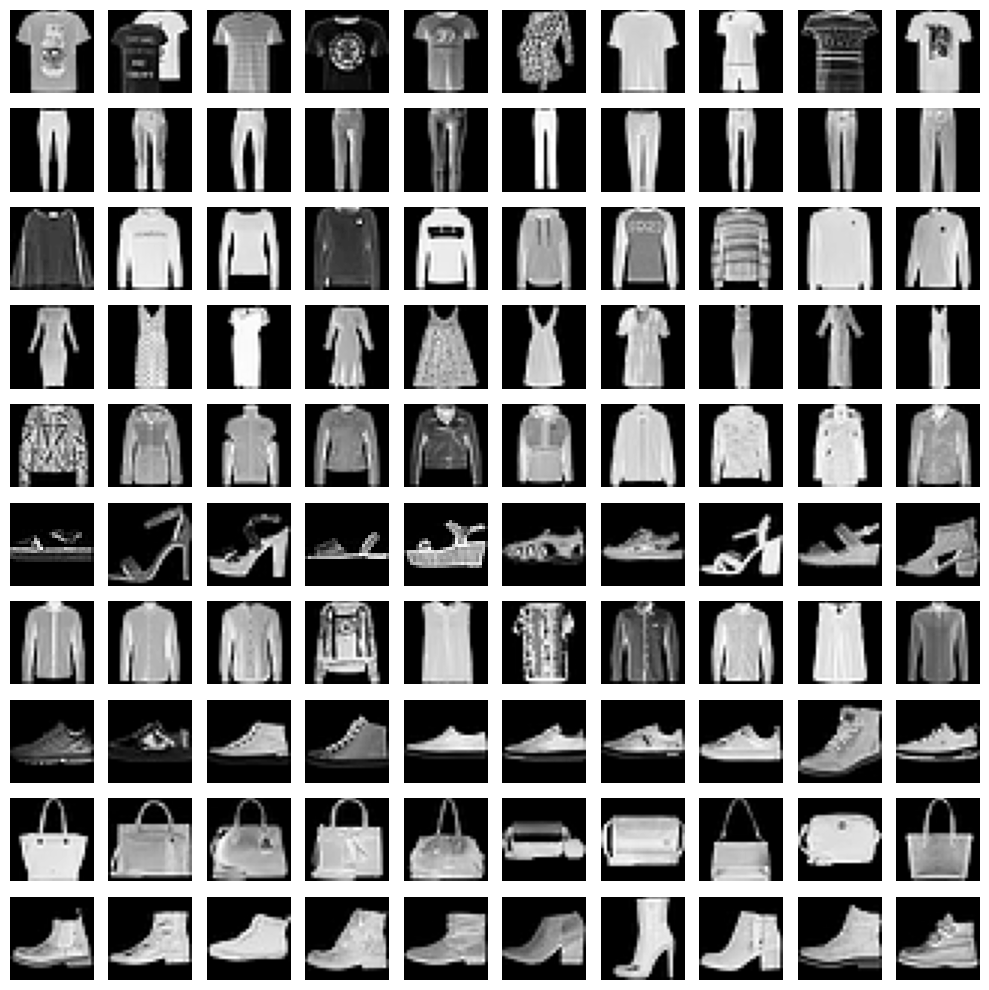

In [6]:
# Unpack tuple
R, C = len(tr_targets.unique()), 10

# Again, unpacking
fig, ax = plt.subplots(R, C, figsize=(10,10))

### The plt.subplots() function returns a tuple containing two elements: The first element is the Figure object (fig). The second element is an array of Axes objects (ax).
# subplots(R, C): This function creates a grid of subplots //
# fig: This variable stores the Figure object. The Figure is the overall container for all the plots and includes settings like size, layout, and overall appearance.
# ax: This variable stores an array of Axes objects. Each Axes object corresponds to an individual subplot within the figure. You can think of Axes as the area where data is plotted (the "canvas" for each subplot).
# figsize: This argument specifies the size of the figure in inches.
###
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

# Single Subplot: To access the subplot for class 0 in the first column, you would use ax[0, 0].
# Row Iteration: In the loop, plot_row represents a complete row (e.g., ax[0] for class 0).
# The structure of the ax array would look something like this:
# ax = [    [ax[0, 0], ax[0, 1], ax[0, 2], ..., ax[0, 9]],  # Row 0 - Class 0
#      [ax[1, 0], ax[1, 1], ax[1, 2], ..., ax[1, 9]],  # Row 1 - Class 1
#      [ax[2, 0], ax[2, 1], ax[2, 2], ..., ax[2, 9]],  # Row 2 - Class 2